In [1]:
%reload_ext autoreload
%autoreload 2

## Primero lo primero

In [301]:
from npfd import data

X_train, X_val, y_train, y_val = data.dataset.make_dataset(dataset_name='dmps', test_size=0.2, seed=23)

INFO:root:Converting real raw files to HTK format ...


23


INFO:root:Generating Master Label File (Train)...
INFO:root:Generating Master Label File (Test)...


In [307]:
from npfd.models.base import HiddenMarkovModel

vf = 0.5
mv = 0.0038
wip = 1.97
pt = 1000

model = HiddenMarkovModel()
model.initialize(X_train, variance_floor=vf, minimum_variance=mv)
model.train(X_train, y_train, minimum_variance=mv, pruning_threshold=pt)

model.edit([f'AT 2 4 0.2 {{ne.transP}}', 
            f'AT 4 2 0.2 {{ne.transP}}'])
model.train(X_train, y_train, minimum_variance=mv, pruning_threshold=pt)

gaussian_duplication_times = 4
for i in range(1, gaussian_duplication_times+1):
    model.edit([f'MU {2**i} {{*.state[2-4].mix}}'])
    model.train(X_train, y_train, minimum_variance=mv, pruning_threshold=pt)
    
    results = model.test(X_val, y_val, word_insertion_penalty=wip)
    print(f"mfcc: {results['MMC']}")

INFO:root:Initializing model...
INFO:root:/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/npfd/models/HTK/misc
INFO:root:Training the model...



/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/notebooks/RPIC
Pruning-Off

Pruning-Off



INFO:root:Editing model 3
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Editing model 7
INFO:root:Training the model...


Pruning-Off


Pruning-Off

Pruning-Off



INFO:root:Testing model: 11


Pruning-Off


====================== HTK Results Analysis =======================
  Date: Tue Aug  3 12:49:30 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf
------------------------ Overall Results --------------------------
SENT: %Correct=24.35 [H=66, S=205, N=271]
WORD: %Corr=89.31, Acc=-45.95 [H=309, D=16, S=21, I=468, N=346]
------------------------ Confusion Matrix -------------------------
       e   n 
           e  Del [ %c / %e]
   e  34   2    3 [94.4/0.6]
  ne  19  275  13 [93.5/5.5]
Ins  223 245



INFO:root:Editing model 11
INFO:root:Training the model...


mfcc: 0.21414706204375725

Pruning-Off

Pruning-Off



INFO:root:Testing model: 15


Pruning-Off


====================== HTK Results Analysis =======================
  Date: Tue Aug  3 12:49:41 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf
------------------------ Overall Results --------------------------
SENT: %Correct=25.83 [H=70, S=201, N=271]
WORD: %Corr=89.60, Acc=-43.35 [H=310, D=15, S=21, I=460, N=346]
------------------------ Confusion Matrix -------------------------
       e   n 
           e  Del [ %c / %e]
   e  32   3    4 [91.4/0.9]
  ne  18  278  11 [93.9/5.2]
Ins  198 262



INFO:root:Editing model 15
INFO:root:Training the model...


mfcc: 0.20990790472279763

Pruning-Off

Pruning-Off



INFO:root:Testing model: 19


Pruning-Off


====================== HTK Results Analysis =======================
  Date: Tue Aug  3 12:49:53 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf
------------------------ Overall Results --------------------------
SENT: %Correct=21.77 [H=59, S=212, N=271]
WORD: %Corr=90.75, Acc=-51.45 [H=314, D=13, S=19, I=492, N=346]
------------------------ Confusion Matrix -------------------------
       e   n 
           e  Del [ %c / %e]
   e  32   4    3 [88.9/1.2]
  ne  15  282  10 [94.9/4.3]
Ins  152 340



INFO:root:Editing model 19
INFO:root:Training the model...


mfcc: 0.21214739519989298

Pruning-Off

Pruning-Off



INFO:root:Testing model: 23


Pruning-Off


====================== HTK Results Analysis =======================
  Date: Tue Aug  3 12:50:09 2021
  Ref : >ocumentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_labels.mlf
  Rec : >gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf
------------------------ Overall Results --------------------------
SENT: %Correct=23.62 [H=64, S=207, N=271]
WORD: %Corr=92.49, Acc=-54.34 [H=320, D=11, S=15, I=508, N=346]
------------------------ Confusion Matrix -------------------------
       e   n 
           e  Del [ %c / %e]
   e  33   5    1 [86.8/1.4]
  ne  10  287  10 [96.6/2.9]
Ins  158 350

mfcc: 0.2352799961605264


In [308]:
results

{'SENT_Correct': 23.62,
 'SENT_H': 64.0,
 'SENT_S': 207.0,
 'SENT_N': 271.0,
 'WORD_Corr': 92.49,
 'WORD_Acc': -54.34,
 'WORD_H': 320.0,
 'WORD_D': 11.0,
 'WORD_S': 15.0,
 'WORD_I': 508.0,
 'WORD_N': 346.0,
 'mlf': PosixPath('/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/results.mlf'),
 'FNR': 0.21838111298482293,
 'TP': 927,
 'TN': 29020,
 'FP': 7814,
 'FN': 259,
 'F1': 0.18676337262012693,
 'MMC': 0.2352799961605264,
 'TPR': 0.781618887015177,
 'N': 38020}

KeyboardInterrupt: 

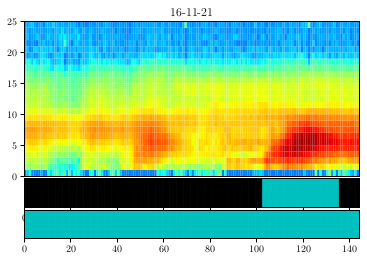

In [300]:
from npfd import visualization as viz

viz.visualize.generate_plots('results', X_val, y_val, results)

## Etiquetas

In [41]:
from npfd.data.size_distribution import cm3_to_dndlogdp
from npfd.visualization.visualize import read_mlf_label
from npfd.data.htk import read_data

import matplotlib.pyplot as plt
import numpy as np

def plot_X_y1_y2(file, y1, y2, out_dir=None, show=True, xlim=None):
    _, obs, delta, acc = read_data(file)
    file_length = obs.__len__()
    label1_start, label1_end, labels1 = read_mlf_label(y1['mlf'], file.stem, file_length)
    label2_start, label2_end, labels2 = read_mlf_label(y2['mlf'], file.stem, file_length)

    f = plt.figure()
    size = f.get_size_inches()
    if xlim is None:
        lw = size[0]*72/file_length
    else:
        lw = (xlim[1]-xlim[0])*72/file_length
    ax1 = plt.subplot2grid((14, 12), (0, 0), rowspan=10, colspan=12)
    plt.pcolor(obs.values[::1, ::1].T, cmap='jet')
    plt.clim(0, 4)
    
    # plt.title(pd.to_datetime(file.stem).strftime('%Y-%m-%d'))
    plt.title(file.stem)
    ax1.axes.get_xaxis().set_visible(False)
    ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=2, colspan=12)
    ax2.plot(label1_start.index, np.ones(label1_start.index.shape[0]))
    for t, label in zip(label1_end.index, label1_end.values):
        if label == 'equ' or label == 'ne':
            ax2.axvline(t, color='k', linewidth=lw)
        if label == 'nuc':
            ax2.axvline(t, color='g', linewidth=lw)
        if label == 'con':
            ax2.axvline(t, color='r', linewidth=lw)
        if label == 'coa':
            ax2.axvline(t, color='b', linewidth=lw)
        if label == 'dep':
            ax2.axvline(t, color='y', linewidth=lw)
        if label == 'e':
            ax2.axvline(t, color='c', linewidth=lw)
            
    ax2.axes.get_yaxis().set_visible(False)
    plt.xlim([label1_start.index[0], label1_end.index[-1]])
    ax3 = plt.subplot2grid((14, 12), (12, 0), rowspan=2, colspan=12)
    ax3.plot(label2_start.index, np.ones(label2_start.index.shape[0]))

    for t, label in zip(label2_end.index, label2_end.values):
        if label == 'equ' or label == 'ne':
            ax3.axvline(t, color='k', linewidth=lw)
        if label == 'nuc':
            ax3.axvline(t, color='g', linewidth=lw)
        if label == 'con':
            ax3.axvline(t, color='r', linewidth=lw)
        if label == 'coa':
            ax3.axvline(t, color='b', linewidth=lw)
        if label == 'dep':
            ax3.axvline(t, color='y', linewidth=lw)
        if label == 'e':
            ax3.axvline(t, color='c', linewidth=lw)
    ax3.axes.get_yaxis().set_visible(False)

    plt.xlim([label1_start.index[0], label1_end.index[-1]])

    if out_dir is not None:
        plt.savefig(figures_path / out_dir / file.stem)
    if xlim is not None:
        plt.setp(ax1, xlim=xlim)
        plt.setp(ax2, xlim=xlim)
        plt.setp(ax3, xlim=xlim)
    if show:
        plt.show()


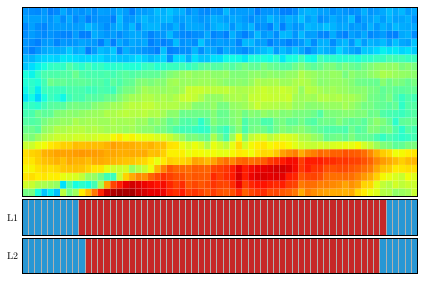

In [159]:
import pathlib
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
cm = matplotlib.colors.ListedColormap(['#2897d4', '#c62828'])

date = '17-12-24'
file = pathlib.Path(f'/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A/{date}')
xlim = [30, 93]


y1 = y_val
y2 = results
_, obs, delta, acc = read_data(file)
file_length = obs.__len__()

l1 = data.labels.mlf_to_dataframe(y1['mlf'], date)
l1.columns = ['l1']
l1 = l1.replace({'ne':0, 'e':1})

l2 = data.labels.mlf_to_dataframe(y2['mlf'], date)
l2.columns = ['l2']
l2 = l2.replace({'ne':0, 'e':1})

f = plt.figure()

size = f.get_size_inches()

ax1 = plt.subplot2grid((14, 12), (0, 0), rowspan=10, colspan=12)
plt.pcolor(obs.values[1::1, 1::1].T, cmap='jet')
plt.clim(0, 4)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=2, colspan=12)
ax2.pcolor(l1.T, cmap=cm)
# ax2.axes.get_yaxis().set_visible(False)
# ax2.axes.get_xaxis().set_visible(False)
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.tick_params(axis='y', which='both', left=False)
ax2.set_ylabel('L1', rotation=0, ha='right', va='center', ma='left')
ax2.set_xticks(range(xlim[0], xlim[1]))
ax2.grid(which='major')
ax2.tick_params(axis='x', which='both', bottom=False)
plt.setp(ax2.get_xticklabels(), visible=False) 


ax3 = plt.subplot2grid((14, 12), (12, 0), rowspan=2, colspan=12)
ax3.pcolor(l2.T, cmap=cm)
ax3.set_xticks(range(xlim[0], xlim[1]))
ax3.grid(which='major')
ax3.tick_params(axis='x', which='both', bottom=False)
plt.setp(ax3.get_xticklabels(), visible=False) 
plt.setp(ax3.get_yticklabels(), visible=False)
ax3.tick_params(axis='y', which='both', left=False)
ax3.set_ylabel('L2', rotation=0, ha='right', va='center', ma='left')

if xlim is not None:
    plt.setp(ax1, xlim=xlim)
    plt.setp(ax2, xlim=xlim)
    plt.setp(ax3, xlim=xlim)
f.tight_layout(h_pad=0)   
f.savefig('/home/gfogwil/Documentos/Facultad/RPIC/figures/labels.pgf')

## Cálculo de la métrica

In [154]:
def get_metric(mlf_real, mlf_auto, date):
    
    real = data.labels.mlf_to_dataframe(mlf_real, date)
    real.columns = ['label_r']
    real = real.replace({'ne':0, 'e':1})
    
    hmm_prediction = data.labels.mlf_to_dataframe(mlf_auto, date)
    hmm_prediction.columns = ['label_a']
    hmm_prediction = hmm_prediction.replace({'ne':0, 'e':1})

    all_lab = pd.concat([real, hmm_prediction],axis=1)

    m = 0
    for idx, l in all_lab.iterrows():
        if not l['label_r'] and not l['label_a']:
            m += 1
        if not l['label_r'] and l['label_a']:
            m += 0
        if l['label_r'] and not l['label_a']:
            m -= 1
        if l['label_r'] and l['label_a']:
            m += 1
            
    n = all_lab.shape[0]
    
    return m, n

In [155]:
get_metric(y_val['mlf'], results['mlf'], '15-02-15')

0.11805555555555555

In [159]:
import pathlib
scp = pathlib.Path('/home/gfogwil/Documentos/Facultad/Tesis/models/bdb/data/interim/dmps_test_D_A.scp')

In [164]:
for line in scp.open().read().splitlines():
    date = line.split('/')[-1]

13-02-02
18-01-26
20-01-02
20-02-22
15-08-27
19-04-10
18-03-25
16-09-24
18-10-23
16-12-28
19-04-24
16-09-18
19-11-01
17-11-04
17-03-21
19-01-29
20-03-10
19-12-10
17-04-22
16-04-15
16-07-27
17-11-15
18-10-03
18-10-12
18-11-13
18-08-27
15-09-02
18-11-08
16-12-22
15-05-01
18-08-19
18-04-17
19-01-11
19-10-31
15-09-03
16-08-14
15-03-12
19-05-11
19-01-07
17-05-02
20-05-05
17-03-13
20-03-20
20-01-11
17-02-23
15-09-17
16-05-16
16-08-01
16-12-21
14-02-04
17-10-06
19-11-06
16-12-30
20-02-13
15-04-12
19-10-04
16-02-24
18-09-28
18-05-24
19-01-17
20-08-10
19-08-22
18-09-29
17-03-11
19-10-13
16-11-29
16-02-16
19-09-29
17-01-11
15-03-31
15-06-30
15-03-24
20-07-30
16-05-01
15-10-30
19-08-20
20-05-01
15-05-21
18-07-10
20-02-12
18-03-16
20-06-08
19-10-11
18-04-10
20-04-10
19-04-11
18-11-15
15-10-28
18-04-22
18-12-01
16-10-31
17-05-09
17-01-10
18-07-26
19-05-29
20-02-19
17-01-30
18-07-13
20-07-27
16-03-04
17-01-03
16-12-07
18-10-30
20-07-25
18-01-28
18-09-18
19-06-12
16-07-05
17-11-26
19-07-19
17-10-31
1

In [135]:
all_lab

,label_r,label_a
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
139,0,1
140,0,1
141,0,1
142,0,1


0.11805555555555555

In [12]:
'0 62400 ne'.split()

['0', '62400', 'ne']

144

In [149]:
import pandas as pd

lala = pd.DataFrame(index=[],data=[], columns=['a'])


In [49]:
lala

,a


In [54]:
lala.loc[1:12,'a']=1

In [55]:
lala

,a
